In [11]:
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os


import seaborn as sns
from matplotlib import rcParams

#绘图前的基本设置

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
matplotlib.rcParams['font.size'] = 16

# matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
# matplotlib.rcParams['font.size'] = 0.3
# matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss

%matplotlib inline  
#内嵌绘图，并且可以省略掉plt.show()这一步
# os.chdir('D:\\BaiduSyncdisk\\EHF-文献-数据-文章\\EHF\\EHF\\figure-统计\\mean') #笔记本电脑
os.chdir(r'E:\BaiduSyncdisk\Futureheatwave\data\trend\interpolation')   #台式机

cmap =list(["steelblue", "yellowgreen","orange","lightcoral","red", "green","lightskyblue"])

In [6]:
import pandas as pd

# Load the data from the CSV file
data_path = 'Future_and_Historical_Population_Exposure_by_year_province_age_exposure.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe to understand its structure and the available columns
# data.head(), data.columns
# 选择需要的列
data = data[['Year', 'Population_Exposure', 'Variable']]

# 按年份和情景聚合数据，计算全国总体暴露情况
total_exposure = data.groupby(['Year', 'Variable'])['Population_Exposure'].sum().reset_index()



# 分割历史和未来情景数据
historical_data = total_exposure[(total_exposure['Year'] >= 2001) & (total_exposure['Year'] <= 2020)]
ssp_data = total_exposure[(total_exposure['Year'] >= 2041) & (total_exposure['Year'] <= 2100)]

import matplotlib.pyplot as plt

# 绘制2001-2020年全国总体暴露情况
plt.figure(figsize=(10, 6))
plt.plot(historical_data['Year'], historical_data['Population_Exposure'], label='Historical (2001-2020)', marker='o')

# 绘制2041-2100年两种SSP情景下全国总体暴露情况
for ssp in ssp_data['Variable'].unique():
    ssp_subset = ssp_data[ssp_data['Variable'] == ssp]
    plt.plot(ssp_subset['Year'], ssp_subset['Population_Exposure'], label=f'SSP {ssp} (2041-2100)', marker='o')

# 添加标题和标签
# plt.title('全国总体暴露情况时间序列图')
plt.xlabel('Year')
plt.ylabel('Population_Exposure')
plt.legend()
plt.grid(True)
plt.show()

# 导出每年总体暴露数据到 CSV 文件
total_exposure.to_csv('Total_Population_Exposure_by_Year_and_Variable.csv', index=False)



KeyError: "['Population_Exposure'] not in index"

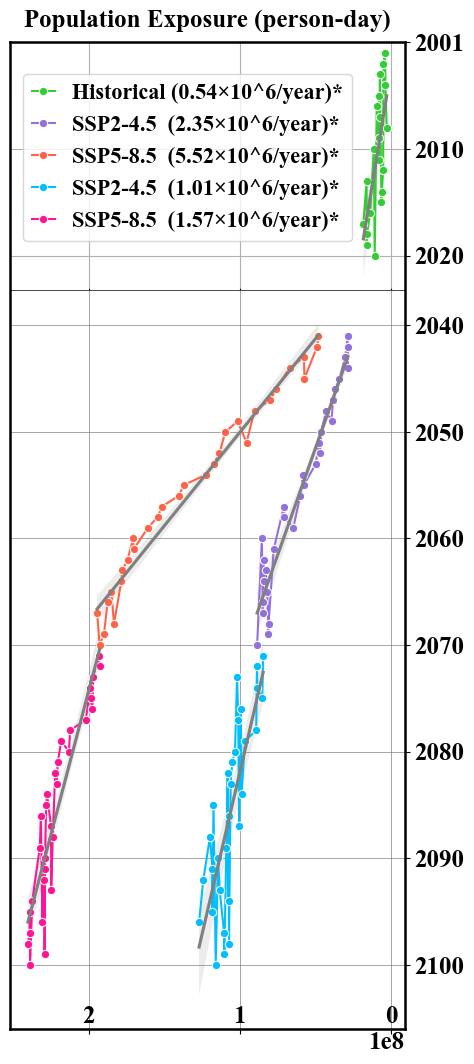

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = 'Future_and_Historical_Population_Exposure_by_year_province_age_exposure.csv'
data = pd.read_csv(file_path)

# 选择需要的列
data = data[['Year', 'Population_Exposure', 'Variable']]

# 按年份和情景聚合数据，计算全国总体暴露情况
total_exposure = data.groupby(['Year', 'Variable'])['Population_Exposure'].sum().reset_index()

# 分割数据
historical_data = total_exposure[(total_exposure['Year'] >= 2001) & (total_exposure['Year'] <= 2020)]
ssp_2041_2070 = total_exposure[(total_exposure['Year'] >= 2041) & (total_exposure['Year'] <= 2070)]
ssp_2071_2100 = total_exposure[(total_exposure['Year'] >= 2071) & (total_exposure['Year'] <= 2100)]

# 创建两个子图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4.6, 10.5), sharex=True, gridspec_kw={'height_ratios': [1, 3], 'hspace': 0.005})

# 加粗子图的边框线
for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_linewidth(1.8)

# 设置ax1底边线宽度为0.0
ax1.spines['bottom'].set_linewidth(0.0)
# 设置ax2顶边线宽度为0.5
ax2.spines['top'].set_linewidth(0.5)

plt.subplots_adjust(left=0.012, right=0.87, top=0.97, bottom=0.03)

# 绘制2001-2020年全国总体暴露情况
sns.lineplot(data=historical_data, x='Population_Exposure', y='Year', label='Historical (0.54×10^6/year)*', marker='o', color='limegreen', ax=ax1)
sns.regplot(data=historical_data, x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax1)

# 绘制2041-2100年两种SSP情景下全国总体暴露情况
sns.lineplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', label='SSP2-4.5  (2.35×10^6/year)*', marker='o', color='mediumpurple', ax=ax2)
sns.lineplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', label='SSP5-8.5  (5.52×10^6/year)*', marker='o', color='tomato', ax=ax2)
sns.lineplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', label='SSP2-4.5  (1.01×10^6/year)*', marker='o', color='deepskyblue', ax=ax2)
sns.lineplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', label='SSP5-8.5  (1.57×10^6/year)*', marker='o', color='deeppink', ax=ax2)

# 绘制回归线
sns.regplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)
sns.regplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)
sns.regplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)
sns.regplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)

# 设置轴标签和方向
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.invert_yaxis()
ax1.invert_xaxis()
ax1.yaxis.set_label_position("left")
ax1.yaxis.tick_right()

ax2.set_xlabel('Population Exposure (person-day)')
ax2.set_ylabel('')
ax2.invert_yaxis()
ax2.yaxis.set_label_position("left")
ax2.yaxis.tick_right()

# 设置X轴标签的位置
ax2.xaxis.set_label_coords(0.5, 1.38)

# 将X轴的标签放在框线下部内部
ax2.xaxis.set_tick_params(pad=-20)

# 设置图例
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper right', bbox_to_anchor=(0.78, 0.95), fontsize=16,handlelength=1)

# 去除子图单独的图例
ax1.get_legend().remove()
ax2.get_legend().remove()
# 添加网格
ax1.grid(True)
ax2.grid(True)

# 设置Y轴的刻度
ax1.set_yticks([2000, 2010, 2020])
ax1.set_yticklabels(['2001', '2010', '2020'])

ax2.set_yticks([2040, 2050, 2060, 2070, 2080, 2090, 2100])
ax2.set_yticklabels(['2040', '2050', '2060', '2070', '2080', '2090', '2100'])

ax2.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

# 保存图像
plt.savefig('01_exposure_change.png', dpi=500, facecolor="none", transparent=True)
# plt.savefig('01_exposure_change.jpg', dpi=300, facecolor="none", transparent=True)
plt.show()


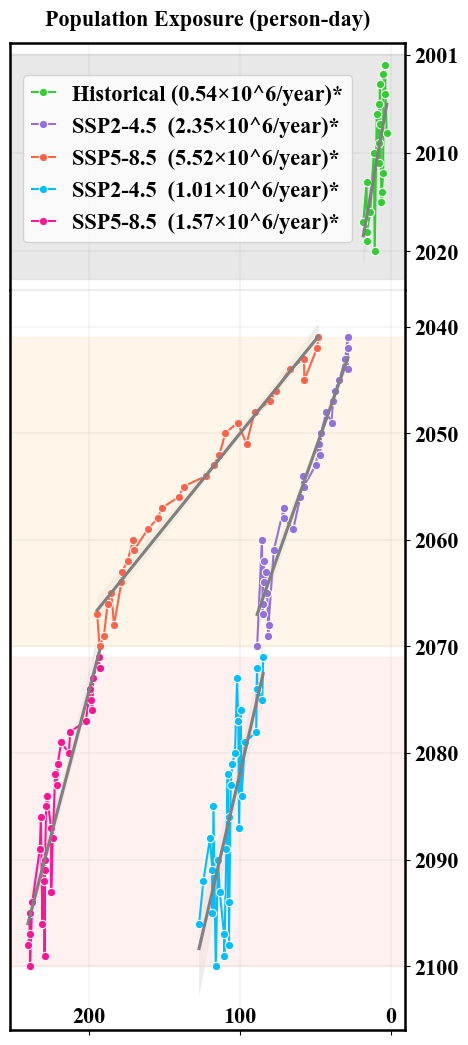

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = 'Future_and_Historical_Population_Exposure_by_year_province_age_exposure.csv'
data = pd.read_csv(file_path)

# 选择需要的列
data = data[['Year', 'Population_Exposure', 'Variable']]

# 按年份和情景聚合数据，计算全国总体暴露情况
total_exposure = data.groupby(['Year', 'Variable'])['Population_Exposure'].sum().reset_index()

# 分割数据
historical_data = total_exposure[(total_exposure['Year'] >= 2001) & (total_exposure['Year'] <= 2020)]
ssp_2041_2070 = total_exposure[(total_exposure['Year'] >= 2041) & (total_exposure['Year'] <= 2070)]
ssp_2071_2100 = total_exposure[(total_exposure['Year'] >= 2071) & (total_exposure['Year'] <= 2100)]

# 创建两个子图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4.6, 10.5), sharex=True, gridspec_kw={'height_ratios': [1, 3], 'hspace': 0.001})

# 加粗子图的边框线
for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_linewidth(1.8)

# 设置ax1底边线宽度为0.0
ax1.spines['bottom'].set_linewidth(0.0)
# 设置ax2顶边线宽度为0.5
ax2.spines['top'].set_linewidth(0.1)

plt.subplots_adjust(left=0.012, right=0.87, top=0.97, bottom=0.03)

# 绘制2001-2020年全国总体暴露情况
sns.lineplot(data=historical_data, x='Population_Exposure', y='Year', label='Historical (0.54×10^6/year)*', marker='o', color='limegreen', ax=ax1)
sns.regplot(data=historical_data, x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax1)

# 绘制2041-2100年两种SSP情景下全国总体暴露情况
sns.lineplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', label='SSP2-4.5  (2.35×10^6/year)*', marker='o', color='mediumpurple', ax=ax2)
sns.lineplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', label='SSP5-8.5  (5.52×10^6/year)*', marker='o', color='tomato', ax=ax2)
sns.lineplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', label='SSP2-4.5  (1.01×10^6/year)*', marker='o', color='deepskyblue', ax=ax2)
sns.lineplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', label='SSP5-8.5  (1.57×10^6/year)*', marker='o', color='deeppink', ax=ax2)

# 绘制回归线
sns.regplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)
sns.regplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)
sns.regplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)
sns.regplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)

# 设置轴标签和方向
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.invert_yaxis()
ax1.invert_xaxis()
ax1.yaxis.set_label_position("left")
ax1.yaxis.tick_right()

ax2.set_xlabel('Population Exposure (person-day)')
ax2.set_ylabel('')
ax2.invert_yaxis()
ax2.yaxis.set_label_position("left")
ax2.yaxis.tick_right()

# 设置X轴标签的位置
ax2.xaxis.set_label_coords(0.5, 1.38)

# 将X轴的标签放在框线下部内部
ax2.xaxis.set_tick_params(pad=-20)

# 设置图例
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper right', bbox_to_anchor=(0.78, 0.95), fontsize=16,handlelength=1)

# 去除子图单独的图例
ax1.get_legend().remove()
ax2.get_legend().remove()
# 添加网格
ax1.grid(True)
ax2.grid(True)

# 设置Y轴的刻度
ax1.set_yticks([2000, 2010, 2020])
ax1.set_yticklabels(['2001', '2010', '2020'])

ax2.set_yticks([2040, 2050, 2060, 2070, 2080, 2090, 2100])
ax2.set_yticklabels(['2040', '2050', '2060', '2070', '2080', '2090', '2100'])

ax2.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

# 保存图像

# 获取ax1中的最大和最小年份
y_min, y_max = ax1.get_ylim()

# 获取图表的x轴边界
x_min, x_max = ax1.get_xlim()

# 使用fill_betweenx方法在指定范围内添加填充
ax1.fill_betweenx(y=np.linspace(y_min, y_max, 100), x1=x_min, x2=x_max, color='lightgray', alpha=0.5)

# 重新设置原有的x轴边界，以保持数据展示的一致性
ax1.set_xlim(x_min, x_max)


# 获取ax2中的最大和最小年份
y_min, y_max = ax2.get_ylim()

# 获取图表的x轴边界
x_min, x_max = ax2.get_xlim()

# 对2041-2070年份范围添加浅红色填充
ax2.fill_betweenx(y=np.linspace(2041, 2070, 30), x1=x_min, x2=x_max, color='papayawhip', alpha=0.5)

# 对2071-2100年份范围添加浅黄色填充
ax2.fill_betweenx(y=np.linspace(2071, 2100, 30), x1=x_min, x2=x_max, color='mistyrose', alpha=0.5)

# 重新设置原有的x轴边界，以保持数据展示的一致性
ax2.set_xlim(x_min, x_max)

import matplotlib.ticker as ticker

# 设置网格线的线宽
ax1.grid(which='major', linestyle='-', linewidth='0.1', color='grey')
ax1.grid(which='minor', linestyle=':', linewidth='0.1', color='grey')
ax2.grid(which='major', linestyle='-', linewidth='0.1', color='grey')
ax2.grid(which='minor', linestyle=':', linewidth='0.1', color='grey')

# 设置x轴的刻度格式为科学记数法
def format_func(value, tick_number):
    return f'{value / 1e6:.0f}'

ax2.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# # 确保之前添加的填充与刻度格式调整不冲突
# ax1.fill_betweenx(y=np.linspace(y_min, y_max, 100), x1=x_min, x2=x_max, color='lightgray', alpha=0.5)
# ax2.fill_betweenx(y=np.linspace(2041, 2070, 30), x1=x_min, x2=x_max, color='papayawhip', alpha=0.5)
# ax2.fill_betweenx(y=np.linspace(2071, 2100, 30), x1=x_min, x2=x_max, color='mistyrose', alpha=0.5)

# # 再次设置原有的x轴边界，以保持数据展示的一致性
# ax1.set_xlim(x_min, x_max)
# ax2.set_xlim(x_min, x_max)

# 注意：确保将填充代码放在所有绘图代码之后，这样填充不会覆盖数据线
plt.savefig('0111_exposure_change.png', dpi=500, facecolor="none", transparent=True)
# plt.savefig('01_exposure_change.jpg', dpi=300, facecolor="none", transparent=True)
plt.show()


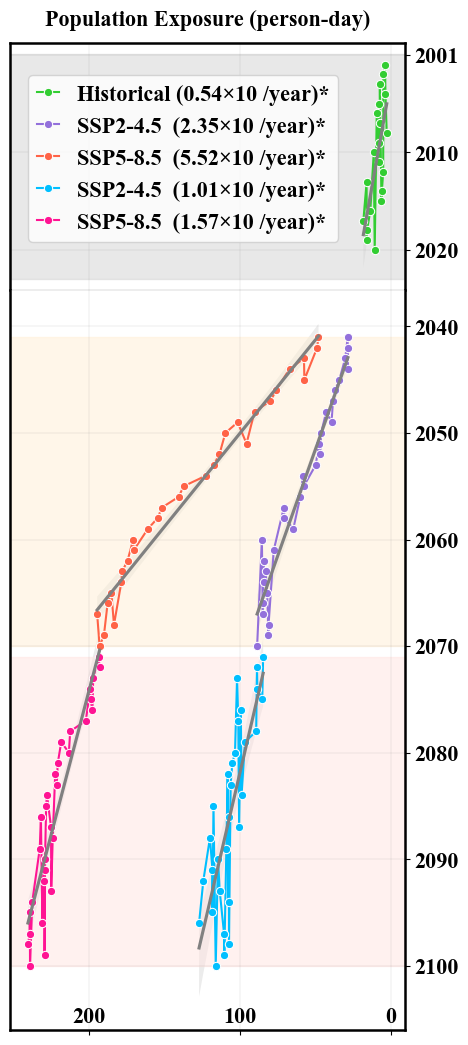

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = 'Future_and_Historical_Population_Exposure_by_year_province_age_exposure.csv'
data = pd.read_csv(file_path)

# 选择需要的列
data = data[['Year', 'Population_Exposure', 'Variable']]

# 按年份和情景聚合数据，计算全国总体暴露情况
total_exposure = data.groupby(['Year', 'Variable'])['Population_Exposure'].sum().reset_index()

# 分割数据
historical_data = total_exposure[(total_exposure['Year'] >= 2001) & (total_exposure['Year'] <= 2020)]
ssp_2041_2070 = total_exposure[(total_exposure['Year'] >= 2041) & (total_exposure['Year'] <= 2070)]
ssp_2071_2100 = total_exposure[(total_exposure['Year'] >= 2071) & (total_exposure['Year'] <= 2100)]

# 创建两个子图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4.6, 10.5), sharex=True, gridspec_kw={'height_ratios': [1, 3], 'hspace': 0.001})

# 加粗子图的边框线
for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_linewidth(1.8)

# 设置ax1底边线宽度为0.0
ax1.spines['bottom'].set_linewidth(0.0)
# 设置ax2顶边线宽度为0.5
ax2.spines['top'].set_linewidth(0.1)

plt.subplots_adjust(left=0.012, right=0.87, top=0.97, bottom=0.03)

# 绘制2001-2020年全国总体暴露情况
sns.lineplot(data=historical_data, x='Population_Exposure', y='Year', label='Historical (0.54×10 /year)*', marker='o', color='limegreen', ax=ax1)
sns.regplot(data=historical_data, x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax1)

# 绘制2041-2100年两种SSP情景下全国总体暴露情况
sns.lineplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', label='SSP2-4.5  (2.35×10 /year)*', marker='o', color='mediumpurple', ax=ax2)
sns.lineplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', label='SSP5-8.5  (5.52×10 /year)*', marker='o', color='tomato', ax=ax2)
sns.lineplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', label='SSP2-4.5  (1.01×10 /year)*', marker='o', color='deepskyblue', ax=ax2)
sns.lineplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', label='SSP5-8.5  (1.57×10 /year)*', marker='o', color='deeppink', ax=ax2)

# 绘制回归线
sns.regplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)
sns.regplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)
sns.regplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)
sns.regplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)

# 设置轴标签和方向
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.invert_yaxis()
ax1.invert_xaxis()
ax1.yaxis.set_label_position("left")
ax1.yaxis.tick_right()

ax2.set_xlabel('Population Exposure (person-day)')
ax2.set_ylabel('')
ax2.invert_yaxis()
ax2.yaxis.set_label_position("left")
ax2.yaxis.tick_right()

# 设置X轴标签的位置
ax2.xaxis.set_label_coords(0.5, 1.38)

# 将X轴的标签放在框线下部内部
ax2.xaxis.set_tick_params(pad=-20)

# 设置图例
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper right', bbox_to_anchor=(0.75, 0.95), fontsize=16,handlelength=1)

# 去除子图单独的图例
ax1.get_legend().remove()
ax2.get_legend().remove()
# 添加网格
ax1.grid(True)
ax2.grid(True)

# 设置Y轴的刻度
ax1.set_yticks([2000, 2010, 2020])
ax1.set_yticklabels(['2001', '2010', '2020'])

ax2.set_yticks([2040, 2050, 2060, 2070, 2080, 2090, 2100])
ax2.set_yticklabels(['2040', '2050', '2060', '2070', '2080', '2090', '2100'])

ax2.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

# 保存图像

# 获取ax1中的最大和最小年份
y_min, y_max = ax1.get_ylim()

# 获取图表的x轴边界
x_min, x_max = ax1.get_xlim()

# 使用fill_betweenx方法在指定范围内添加填充
ax1.fill_betweenx(y=np.linspace(y_min, y_max, 100), x1=x_min, x2=x_max, color='lightgray', alpha=0.5)

# 重新设置原有的x轴边界，以保持数据展示的一致性
ax1.set_xlim(x_min, x_max)


# 获取ax2中的最大和最小年份
y_min, y_max = ax2.get_ylim()

# 获取图表的x轴边界
x_min, x_max = ax2.get_xlim()

# 对2041-2070年份范围添加浅红色填充
ax2.fill_betweenx(y=np.linspace(2041, 2070, 30), x1=x_min, x2=x_max, color='papayawhip', alpha=0.5)

# 对2071-2100年份范围添加浅黄色填充
ax2.fill_betweenx(y=np.linspace(2071, 2100, 30), x1=x_min, x2=x_max, color='mistyrose', alpha=0.5)

# 重新设置原有的x轴边界，以保持数据展示的一致性
ax2.set_xlim(x_min, x_max)

import matplotlib.ticker as ticker

# 设置网格线的线宽
ax1.grid(which='major', linestyle='-', linewidth='0.1', color='grey')
ax1.grid(which='minor', linestyle=':', linewidth='0.1', color='grey')
ax2.grid(which='major', linestyle='-', linewidth='0.1', color='grey')
ax2.grid(which='minor', linestyle=':', linewidth='0.1', color='grey')

# 设置x轴的刻度格式为科学记数法
def format_func(value, tick_number):
    return f'{value / 1e6:.0f}'

ax2.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# # 确保之前添加的填充与刻度格式调整不冲突
# ax1.fill_betweenx(y=np.linspace(y_min, y_max, 100), x1=x_min, x2=x_max, color='lightgray', alpha=0.5)
# ax2.fill_betweenx(y=np.linspace(2041, 2070, 30), x1=x_min, x2=x_max, color='papayawhip', alpha=0.5)
# ax2.fill_betweenx(y=np.linspace(2071, 2100, 30), x1=x_min, x2=x_max, color='mistyrose', alpha=0.5)

# # 再次设置原有的x轴边界，以保持数据展示的一致性
# ax1.set_xlim(x_min, x_max)
# ax2.set_xlim(x_min, x_max)

# 注意：确保将填充代码放在所有绘图代码之后，这样填充不会覆盖数据线
plt.savefig('01111_exposure_change.png', dpi=500, facecolor="none", transparent=True)
# plt.savefig('01_exposure_change.jpg', dpi=300, facecolor="none", transparent=True)
plt.show()


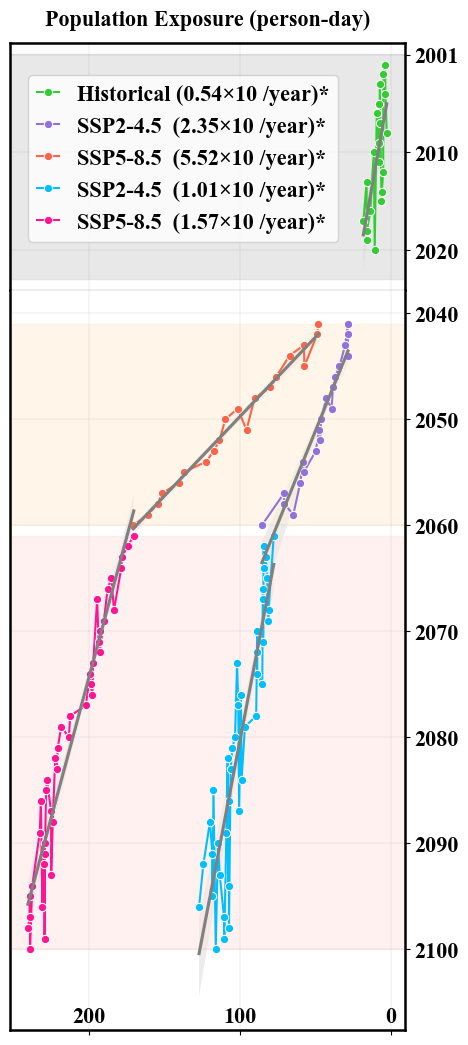

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = 'Future_and_Historical_Population_Exposure_by_year_province_age_exposure.csv'
data = pd.read_csv(file_path)

# 选择需要的列
data = data[['Year', 'Population_Exposure', 'Variable']]

# 按年份和情景聚合数据，计算全国总体暴露情况
total_exposure = data.groupby(['Year', 'Variable'])['Population_Exposure'].sum().reset_index()

# 分割数据
historical_data = total_exposure[(total_exposure['Year'] >= 2001) & (total_exposure['Year'] <= 2020)]
ssp_2041_2070 = total_exposure[(total_exposure['Year'] >= 2041) & (total_exposure['Year'] <= 2060)]
ssp_2071_2100 = total_exposure[(total_exposure['Year'] >= 2061) & (total_exposure['Year'] <= 2100)]

# 创建两个子图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4.6, 10.5), sharex=True, gridspec_kw={'height_ratios': [1, 3], 'hspace': 0.001})

# 加粗子图的边框线
for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_linewidth(1.8)

# 设置ax1底边线宽度为0.0
ax1.spines['bottom'].set_linewidth(0.0)
# 设置ax2顶边线宽度为0.5
ax2.spines['top'].set_linewidth(0.1)

plt.subplots_adjust(left=0.012, right=0.87, top=0.97, bottom=0.03)

# 绘制2001-2020年全国总体暴露情况
sns.lineplot(data=historical_data, x='Population_Exposure', y='Year', label='Historical (0.54×10 /year)*', marker='o', color='limegreen', ax=ax1)
sns.regplot(data=historical_data, x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax1)

# 绘制2041-2100年两种SSP情景下全国总体暴露情况
sns.lineplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', label='SSP2-4.5  (2.35×10 /year)*', marker='o', color='mediumpurple', ax=ax2)
sns.lineplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', label='SSP5-8.5  (5.52×10 /year)*', marker='o', color='tomato', ax=ax2)
sns.lineplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', label='SSP2-4.5  (1.01×10 /year)*', marker='o', color='deepskyblue', ax=ax2)
sns.lineplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', label='SSP5-8.5  (1.57×10 /year)*', marker='o', color='deeppink', ax=ax2)

# 绘制回归线
sns.regplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)
sns.regplot(data=ssp_2041_2070[ssp_2041_2070['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)
sns.regplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP245'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)
sns.regplot(data=ssp_2071_2100[ssp_2071_2100['Variable'] == 'TM_SSP585'], x='Population_Exposure', y='Year', scatter=False, color='grey', ax=ax2)

# 设置轴标签和方向
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.invert_yaxis()
ax1.invert_xaxis()
ax1.yaxis.set_label_position("left")
ax1.yaxis.tick_right()

ax2.set_xlabel('Population Exposure (person-day)')
ax2.set_ylabel('')
ax2.invert_yaxis()
ax2.yaxis.set_label_position("left")
ax2.yaxis.tick_right()

# 设置X轴标签的位置
ax2.xaxis.set_label_coords(0.5, 1.38)

# 将X轴的标签放在框线下部内部
ax2.xaxis.set_tick_params(pad=-20)

# 设置图例
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='upper right', bbox_to_anchor=(0.75, 0.95), fontsize=16,handlelength=1)

# 去除子图单独的图例
ax1.get_legend().remove()
ax2.get_legend().remove()
# 添加网格
ax1.grid(True)
ax2.grid(True)

# 设置Y轴的刻度
ax1.set_yticks([2000, 2010, 2020])
ax1.set_yticklabels(['2001', '2010', '2020'])

ax2.set_yticks([2040, 2050, 2060, 2070, 2080, 2090, 2100])
ax2.set_yticklabels(['2040', '2050', '2060', '2070', '2080', '2090', '2100'])

ax2.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

# 保存图像

# 获取ax1中的最大和最小年份
y_min, y_max = ax1.get_ylim()

# 获取图表的x轴边界
x_min, x_max = ax1.get_xlim()

# 使用fill_betweenx方法在指定范围内添加填充
ax1.fill_betweenx(y=np.linspace(y_min, y_max, 100), x1=x_min, x2=x_max, color='lightgray', alpha=0.5)

# 重新设置原有的x轴边界，以保持数据展示的一致性
ax1.set_xlim(x_min, x_max)


# 获取ax2中的最大和最小年份
y_min, y_max = ax2.get_ylim()

# 获取图表的x轴边界
x_min, x_max = ax2.get_xlim()

# 对2041-2070年份范围添加浅红色填充
ax2.fill_betweenx(y=np.linspace(2041, 2060, 20), x1=x_min, x2=x_max, color='papayawhip', alpha=0.5)

# 对2071-2100年份范围添加浅黄色填充
ax2.fill_betweenx(y=np.linspace(2061, 2100, 40), x1=x_min, x2=x_max, color='mistyrose', alpha=0.5)

# 重新设置原有的x轴边界，以保持数据展示的一致性
ax2.set_xlim(x_min, x_max)

import matplotlib.ticker as ticker

# 设置网格线的线宽
ax1.grid(which='major', linestyle='-', linewidth='0.1', color='grey')
ax1.grid(which='minor', linestyle=':', linewidth='0.1', color='grey')
ax2.grid(which='major', linestyle='-', linewidth='0.1', color='grey')
ax2.grid(which='minor', linestyle=':', linewidth='0.1', color='grey')

# 设置x轴的刻度格式为科学记数法
def format_func(value, tick_number):
    return f'{value / 1e6:.0f}'

ax2.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# # 确保之前添加的填充与刻度格式调整不冲突
# ax1.fill_betweenx(y=np.linspace(y_min, y_max, 100), x1=x_min, x2=x_max, color='lightgray', alpha=0.5)
# ax2.fill_betweenx(y=np.linspace(2041, 2070, 30), x1=x_min, x2=x_max, color='papayawhip', alpha=0.5)
# ax2.fill_betweenx(y=np.linspace(2071, 2100, 30), x1=x_min, x2=x_max, color='mistyrose', alpha=0.5)

# # 再次设置原有的x轴边界，以保持数据展示的一致性
# ax1.set_xlim(x_min, x_max)
# ax2.set_xlim(x_min, x_max)

# 注意：确保将填充代码放在所有绘图代码之后，这样填充不会覆盖数据线
plt.savefig('0111111_exposure_change.png', dpi=500, facecolor="none", transparent=True)
# plt.savefig('01_exposure_change.jpg', dpi=300, facecolor="none", transparent=True)
plt.show()


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
from sklearn.linear_model import LinearRegression

# 加载数据
file_path = r'E:\BaiduSyncdisk\Futureheatwave\data\exposure\Decompose_effects_summary_2001base.csv'
df = pd.read_csv(file_path)

# 分组按年份和情景对人口暴露效应求和
df_grouped = df.groupby(['year', 'variable'])['population_effect'].sum().unstack()

# 选择场景
selected_scenarios = ['TM_SSP245', 'TM_SSP585']

# 为每个场景定义标签和颜色
labels = {
    'TM_SSP245': 'SSP2-4.5',
    'TM_SSP585': 'SSP5-8.5',
}

colors = {
    'TM_SSP245': 'cornflowerblue',
    'TM_SSP585': 'blue',
}

# 定义函数来计算回归线
def calculate_regression(data, peak_year):
    before_peak = data[data.index <= peak_year]
    after_peak = data[data.index > peak_year]
    
    reg_before = LinearRegression().fit(before_peak.index.values.reshape(-1, 1), before_peak.values)
    reg_after = LinearRegression().fit(after_peak.index.values.reshape(-1, 1), after_peak.values)
    
    reg_before_line = (before_peak.index, reg_before.predict(before_peak.index.values.reshape(-1, 1)))
    reg_after_line = (after_peak.index, reg_after.predict(after_peak.index.values.reshape(-1, 1)))
    
    return {
        'regression_before': reg_before_line,
        'regression_after': reg_after_line,
        'equation_before': f'y = {reg_before.coef_[0]:.2f}x + {reg_before.intercept_:.2f}',
        'equation_after': f'y = {reg_after.coef_[0]:.2f}x + {reg_after.intercept_:.2f}'
    }

# 清理数据，去除NaN值
df_cleaned = df.dropna(subset=['population_effect'])
df_grouped_cleaned = df_cleaned.groupby(['year', 'variable'])['population_effect'].sum().unstack()
df_grouped_cleaned_filled = df_grouped_cleaned.dropna()

# 绘制图像
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(left=0.08, right=0.95, top=0.88, bottom=0.09)

legend_handles = []

# 循环处理每个场景
for scenario in selected_scenarios:
    year_max = df_grouped_cleaned_filled[scenario].idxmax()
    results = calculate_regression(df_grouped_cleaned_filled[scenario], year_max)
    
    # 绘制主数据线
    label_text = f"{labels[scenario]} (Peak Year: {year_max})"
    line, = plt.plot(df_grouped_cleaned_filled.index, df_grouped_cleaned_filled[scenario], label=label_text, color=colors[scenario])
    
    # 绘制回归线
    plt.plot(results['regression_before'][0], results['regression_before'][1], linestyle='--', color='gray', alpha=0.5)
    plt.plot(results['regression_after'][0], results['regression_after'][1], linestyle='--', color='gray', alpha=0.5)
    
    legend_handles.append(mlines.Line2D([], [], color=colors[scenario], label=label_text))

# 设置Y轴标签
plt.ylabel('Elderly Population (person)')
plt.text(0.97, 0.75, '(c)', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=18)

# 设置自定义图例
plt.legend(handles=legend_handles, fontsize=10, bbox_to_anchor=(0.05, 1.01, 0.95, 0.12), loc='lower left', 
           handletextpad=0.2, ncol=2, mode="expand", borderaxespad=0.2, handlelength=2)

# 保存图像
output_path_cleaned_final = '02_Elderly_Population_Result_Cleaned_Final.png'
plt.savefig(output_path_cleaned_final, dpi=300)

# 显示图像
plt.show()

# 输出保存的图像路径
print(output_path_cleaned_final)


ValueError: attempt to get argmax of an empty sequence

<Figure size 1000x250 with 0 Axes>